In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
tickers = pd.read_csv("../data/tickers/oslo_tickers.csv")
tickers

In [8]:
# Download prices from Yahoo Finance
ticker = "SCATC.OL"
interval = "1d"
start = dt.datetime(2018,1,1)
end = dt.datetime.today()
prices = yf.download(ticker, start, end, interval=interval)
prices["ticker"] = ticker
cols = prices.columns.tolist()
cols = cols[-1:] + cols[:-1]
prices = prices[cols]
prices

[*********************100%***********************]  1 of 1 completed


,ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2018-01-02,SCATC.OL,50.000000,50.500000,49.650002,50.000000,45.761971,125436
2018-01-03,SCATC.OL,50.000000,50.200001,49.099998,50.000000,45.761971,217138
2018-01-04,SCATC.OL,50.000000,50.000000,49.299999,49.849998,45.624683,135195
2018-01-05,SCATC.OL,49.849998,50.200001,49.799999,49.950001,45.716209,206918
2018-01-08,SCATC.OL,50.000000,50.200001,49.799999,49.950001,45.716209,175574
...,...,...,...,...,...,...,...
2022-11-08,SCATC.OL,83.000000,83.800003,81.860001,83.779999,83.779999,287920
2022-11-09,SCATC.OL,84.019997,85.400002,82.019997,82.320000,82.320000,282681
2022-11-10,SCATC.OL,84.000000,92.260002,81.000000,92.099998,92.099998,1109388


In [13]:
prices_2 = yf.Ticker("SCATC.OL").history("max")


In [4]:
import sqlite3

In [9]:
con = sqlite3.connect("../data/stockanalysis.db")
# prices.to_sql("prices", con, if_exists="replace")
prices.to_sql("prices", con, if_exists="append")

1222

In [19]:
prices["log returns"] = np.log(prices["Adj Close"]) - np.log(prices["Adj Close"].shift(1))

In [20]:
prices["returns"] = prices["Adj Close"].pct_change()

<AxesSubplot: xlabel='Date'>

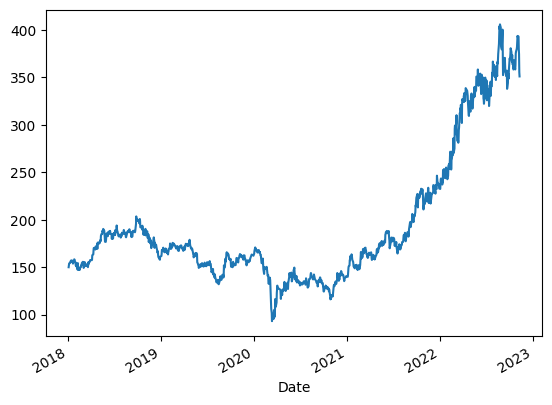

In [21]:
prices["Adj Close"].plot()

<AxesSubplot: >

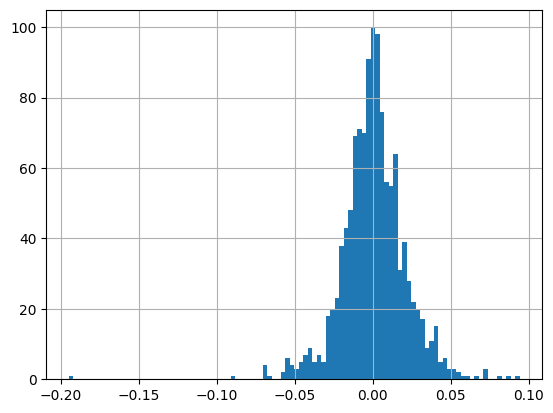

In [23]:
prices["log returns"].hist(bins=100)